**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
*** 

**_Tento materiál vznikol za podpory grantu VVGS-2022-2412._**

***

**<font size=6 color=gold> NUM: Téma 4 - Numerické integrovanie </font>** 

Nazývané tiež **numerická kvadratúra**. 

--- 

<a id=table_of_contents></a>
##  Obsah

* [Úvod](#uvod)


* [Lichobežníkové pravidlo](#lichobeznik) 


* [Kvadratúrne formule vo všeobecnosti](#kvadr_form) 


* [Newtonove-Cotesove vzorce](#newton_cotes) 


* [Gaussova kvadratúra](#gauss) 


* [Podmienenosť úlohy numerického integrovania](#podmienenost)


* [Použité zdroje](#zdroje) 


**Pre návrat na obsah stlačte klávesu <font color=brown>Home</font>.** 

--- 

In [1]:
# nacitanie potrebnych balikov v Python-e 
import math 
import numpy as np 
import sympy as sym 
import scipy as sci 
from decimal import Decimal
from matplotlib import pyplot as plt

***
<a id=uvod></a>
 # <font color=brown> Úvod </font> 

Cieľom tejto témy je predstaviť niektoré možnosti (približného) výpočtu určitého integrálu $I(f):=\displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x$, pričom $a,b\in\mathbb{R}$. Existuje niekoľko dôvodov, pre ktoré nie je možné uvedený integrál $I(f)$ vypočítať presne. Napr.: 

* integrál $I(f)$ nie je možné vypočítať analyticky (neexistuje primitívna funkcia k integrandu resp. nie je reprezentovateľná pomocou elementárnych funkcií);


* analytický výpočet je príliš pracný;


* funkcia $f$ je daná iba tabuľkou hodnôt. 


Za približnú hodnotu integrálu $I(f)$ budeme považovať integrál $Q(f):=I(\varphi)$, kde $\varphi$ je vhodná aproximácia funkcie $f$. 

***
<a id=lichobeznik></a>
 # <font color=brown> Lichobežníkové pravidlo </font> 

Kvôli väčšej názornosti predpokladajme, že funkcia $f$ je na intervale $\langle a,b \rangle$ kladná. Tento interval rozdelíme na $n$ podintervalov rovnakej dĺžky $h=(b-a)/n$ za pomoci deliacich bodov $x_i=a+ih$, $i=0,1,\ldots,n$ a obsah plochy pod grafom $f$ nahradíme (aproximujeme) obsahom plochy pod lomenou čiarou spájajúcou body $[x_{i-1},f(x_{i-1})]$, $[x_i,f(x_i)]$, $i=1,2,\ldots,n$ (viď nasledujúci obrázok). 

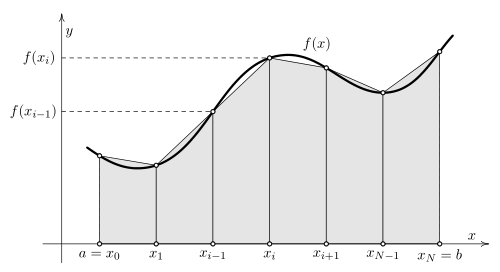
$$\text{Zdroj: Čermák (2020).}$$ 

Funkcia $\varphi$ je v tomto prípade po častiach lineárna aproximácia funkcie $f$ a približná hodnota integrálu $I(f)$ je súčtom obsahov lichobežníkov s vrcholmi $[x_{i-1},0],[x_i,0],[x_i,f(x_i)],[x_{i-1},f(x_{i-1})]$, $i=1,2,\ldots,n$. Výsledná formula má teda tvar 

\begin{equation*} \label{eq:CompTrapForm} \tag{1} 
Q_T^n(f)=\displaystyle\sum\limits_{i=1}^{n}\dfrac{1}{2}h\left(f_{i-1}+f_{i}\right)=h\left[\dfrac{1}{2}f_0+f_1+\ldots+f_{n-1}+\dfrac{1}{2}f_n\right], 
\end{equation*}

kde $f_i=f(x_i)$. Dostali sme tak jeden zo základných vzťahov pre integrovanie - tzv. **_zloženú lichobežníkovú formulu_**. Index $T$ značí *trapezoid* t. j. v preklade z angličtiny lichobežník. Vzťahy pre približný výpočet integrálov sa niekedy nazývajú tiež **_kvadratúrne formule_** resp. **_vzorce_**. 


--- 

#### <font color=blue> Príklad 1 </font> 

Vypočítajte $\displaystyle\int_{1}^{3}e^x\,\mathrm{d}x$ lichobežníkovou metódou a výsledok porovnajte s analytickým riešením. 

<ins> Riešenie: </ins>

In [11]:
from scipy.integrate import trapz 
a = 1 
b = 3 
n = 101 # pocet deliacich bodov (uzlov) intervalu <1,3>
x = np.linspace(a, b, n) # deliace body intervalu <1,3>
f = np.exp(x) # funkcne hodnoty  
I_trapz = trapz(f,x) # numericke integrovanie lichobeznikovym pravidlom 
print(I_trapz)
print(np.exp(3)-np.exp(1)) # skutocna hodnota pre porovnanie (analyticke riesenie: Newtonova-Leibnizova formula)

17.367833999372426
17.367255094728623


In [13]:
# General purpose integration 
from scipy.integrate import quad 
I_quad, est_err_quad = quad(np.exp, 1, 3) 
print(I_quad) # priblizna hodnota integralu 
print(est_err_quad) # odhad chyby numerickej integracie 

17.367255094728623
1.9281526480706272e-13


In [3]:
# exaktny vypocet integralu pomocou balika SymPy 
# symbolicke resp. analyticke riesenie a dosadene integracne hranice (Newtonova-Leibnizova formula) 

x = sym.Symbol('x', real=True) 
f = sym.exp(x)
I_exact = sym.integrate(f,(x,1,3))
print(I_exact) # presny (symbolicky) tvar vysledku 
print(float(I_exact)) # numericky tvar vysledku 

-E + exp(3)
17.367255094728623


--- 

<font color=orange> Uvažujte funkciu $f(x)=\sin(x)$ na intervale $\langle 0,\pi \rangle$. Zvoľte postupne $n=3,5,11,21$ a pomocou zloženej lichobežníkovej formuly aproximujte plochu pod sínusovou krivkou na danom intervale. Porovnajte získané hodnoty so skutočnou hodnotou integrálu (t.j. s analytickým výpočtom). </font> 

<font color=purple> EXTRA: Ak vyriešite predchádzajúcu úlohu tak, že naprogramujete vlastnú funkciu pre lichobežníkové pravidlo, môžete dostať 1 bonusový bod. </font> 

--- 

#### <font color=blue> Príklad 2 </font>  

Niekedy je žiadúce poznať hodnoty približného kumulatívneho integrálu (spomeňte si na distribučnú funkciu v teórii pravdepodobnosti). Tzn. chceme (približne) vypočítať $F(x)=\displaystyle\int_{t_0}^{x}f(t)\,\mathrm{d}t$ (všimnime si, že ide o integrál, ktorý je funkciou hornej medze). Na tento účel dobre poslúži funkcia `cumtrapz()` z knižnice *SciPy*, modul *integrate*, ktorá má rovnaké vstupné parametre ako funkcia `trapz()`. <br/> 
Pre ilustráciu vezmeme funkciu $f(x)=\sin(x)$ na intervale $\langle 0,\pi \rangle$ s diskretizačným krokom $0.01$ (t.j vzdialenosť rovnomerne rozmiestnených uzlov resp. bodov delenia intervalu $\langle 0,\pi \rangle$). Zrejme presné (analytické) riešenie skúmaného integrálu je $F(x)=-\cos(x)+\cos(t_0)$ a v našom prípade špeciálne $F(x)=1-\cos(x)$. 

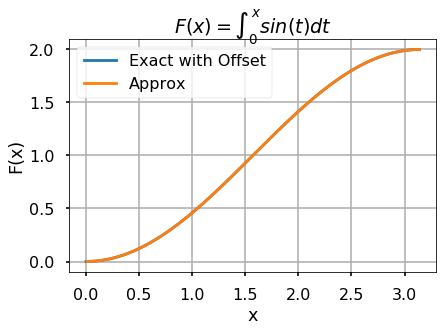

In [4]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
import warnings


%matplotlib inline
plt.style.use('seaborn-poster')

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x) + np.cos(0)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (6,4))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(t) dt$')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()
warnings.filterwarnings('ignore')

Ak uberiete počet deliacich bodov intervalu $\langle 0,\pi \rangle$ tak uvidíte, že aproximácia je menej presná a grafy sa miestami nebudú celkom prekrývať. 

--- 

## Diskretizačná chyba

Teraz sa pozrieme na chybu, ktorej sa dopustíme, keď miesto presného integrálu $I(f)$ použijeme kvadratúrnu formulu $Q_T^n(f)$. Na intervale $\langle x_{i-1}, x_i \rangle$ vznikne chyba 

$$r_i=\displaystyle\int\limits_{x_{i-1}}^{x_i}f(x)\,\mathrm{d}x-\frac{1}{2}h\left[f(x_{i-1})+f(x_i)\right]=\displaystyle\int\limits_{x_{i-1}}^{x_i}\left[f(x)-p_1(x)\right]\,\mathrm{d}x,$$ 

kde 

$$p_1(x)=f(x_{i-1})+\dfrac{f(x_i)-f(x_{i-1})}{h}(x-x_{i-1})$$ 

je lineárny interpolačný polynóm funkcie $f(x)$. Aplikovaním vzťahu pre chybu interpolačného polynómu na výraz $f(x)-p_1(x)$ dostaneme 

$$r_i=\displaystyle\int\limits_{x_{i-1}}^{x_i}\dfrac{1}{2}f''\left(\xi(x)\right)(x-x_{i-1})(x-x_i)\,\mathrm{d}x.$$ 

Keďže funkcia $(x-x_{i-1})(x-x_i)$ nemení znamienko na intervale $\langle x_{i-1},x_i\rangle$, tak z Vety o strednej hodnote pre integrály vyplýva existencia bodu $\eta_i\in(x_{i-1},x_i)$ takého, že platí 

$$r_i=f''(\eta_i)\displaystyle\int\limits_{x_{i-1}}^{x_i}\dfrac{1}{2}(x-x_{i-1})(x-x_i)\,\mathrm{d}x=-\dfrac{1}{12}f''(\eta_i)h^3.$$ 

Pre celkovú chybu $R_T^n(f)=I(f)-Q_T^n(f)$ teda platí  

\begin{equation*} \label{eq:CompTrapFormErr} \tag{2} 
R_T^n(f)=-\dfrac{1}{12}h^3\displaystyle\sum\limits_{i=1}^{n}f''(\eta_i)=-\dfrac{h^2(b-a)}{12n}\displaystyle\sum\limits_{i=1}^{n}f''(\eta_i)=-\dfrac{b-a}{12}f''(\eta)h^2, 
\end{equation*}

pričom $\eta\in(a,b)$. Zrejme $R_T^n(f)$ je $\mathcal{O}\left(h^2\right)$ a diskretizačná chyba $R_T^n(f)\to0$ pre $h\to0$. 

<font color=orange> Odhadnite čo najlepšie diskretizačné chyby v úlohe s funkciou sínus (môžete využiť ohraničenosť funkcie sínus), ktorá je uvedená vyššie (pred Príkladom 2). </font> 

## Zaokrúhľovacia chyba

Ak v kvadratúrnej formule $(1)$ použijeme miesto presných hodnôt $f_i$ približné hodnoty $\tilde{f}_i=f_i+\varepsilon_i$, potom dostaneme 

$$\tilde{Q}_T^n(f)=h\left[\dfrac{1}{2}\tilde{f}_0+\tilde{f}_1+\ldots+\tilde{f}_{n-1}+\dfrac{1}{2}\tilde{f}_n\right]=Q_T^n(f)+h\left[\dfrac{1}{2}\varepsilon_0+\varepsilon_1+\ldots+\varepsilon_{n-1}+\dfrac{1}{2}\varepsilon_n\right].$$

Zrejme platí 

$$I(f)=\tilde{Q}_T^n(f)+R_T^n(f)+E_R,$$

kde $E_R=-h\left[\frac{1}{2}\varepsilon_0+\varepsilon_1+\ldots+\varepsilon_{n-1}+\frac{1}{2}\varepsilon_n\right]$ je celková zaokrúhľovacia chyba. Ak by $|\varepsilon_i|\le\varepsilon=M_0\varepsilon_m$, kde $M_0=\underset{x\in\langle a,b \rangle}{\max}|f(x)|$ a $\varepsilon_m$ je strojová presnosť, tak by sme dostali odhad v tvare 

$$|E_R|\le hn\varepsilon=(b-a)\varepsilon=(b-a)M_0\varepsilon.$$ 

Vidíme, že v konečnom dôsledku veľkosť zaokrúhľovacej chyby $|E_R|$ nezávisí od $h$. Pokiaľ vezmeme do úvahy tiež zaokrúhľovacie chyby aritmetických operácií, potom odhad veľkosti celkovej zaokrúhľovacej chyby bude vyzerať nasledovne 

$$|E_R|\le(b-a)M_0\varepsilon_m+(n+3)M_0\varepsilon_m.$$ 

**Keďže v praxi $n$ nebýva príliš veľké, môžeme konštatovať, že numerické integrovanie je podstatne menej citlivé na zaokrúhľovacie chyby ako numerické derivovanie.** Preto pri bežnom numerickom výpočte integrálu nemusíme zaokrúhľovacím chybám venovať žiadnu osobitnú pozornosť. 

***
<a id=kvadr_form></a>
 # <font color=brown> Kvadratúrne formule vo všeobecnosti </font> 

## Všeobecný tvar kvadratúrnej formule 

Kvadratúrne formule pre približný výpočet integrálu $I(f)=\displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x$ sa zvyknú zapisovať v tvare 

\begin{equation*} \label{eq:GenNumQuadForm} \tag{3} 
Q(f)=w_0f(x_0)+w_1f(x_1)+\ldots+w_nf(x_n). 
\end{equation*} 

Body $x_0,x_1,\ldots,x_n$ sa nazývajú **_uzly_** a čísla $w_0,w_1,\ldots,w_n$ **_koeficienty (váhy)_** kvadratúrnej formule. Budeme predpokladať, že $a\le x_0 < x_1 < \ldots < x_n \le b$. Rozdiel $I(f)-Q(f)$ budeme označovať $R(f)$ a naýzvať ho **_(diskretizačnou) chybou kvadratúrnej formule_**, t. j. platí $I(f)=Q(f)+R(f)$.  

---

#### Poznámka 1

Všeobecná kvadratúrna formula sa niekedy uvádza aj tomto tvare: 

$$Q(f)=(b-a)\displaystyle\sum\limits_{i=0}^{n}\alpha_if(x_i).$$

Vzťah so vzorcom $(3)$ je zrejmý, stačí položiť $\alpha_i=\dfrac{w_i}{b-a}$. 

--- 

## Rád kvadratúrnej formule 

--- 

### <font color=red> Definícia 1 </font> 
 
**_Algebraický rád $r=r(Q)$ kvadratúrnej formule $Q(f)$_** definujeme ako nezáporné celé číso také, že $R\left(x^j\right)=0$ pre $j=0,1,\ldots,r$ a $R\left(x^{r+1}\right)\neq0$, pričom $R$ označuje chybu (zvyšok) kvaratúrnej formule. Používa sa tiež označenie **_rád presnosti kvadratúrnej formule_**.

---

---

#### Poznámka 2 

Formula je teda rádu $r$, keď integruje presne polynómy až do rádu $r$ a polynómy rádu $r+1$ resp. vyššieho už presne neintegruje. Charakteristika kvality kvadratúrnej formule pomocou algebraického rádu je prirodzená. Totiž podľa Weierstrassovej vety (vid téma 2) je možné každú spojitú funkciu ľubovoľne presne aproximovať polynómom (vhodného stupňa). 

--- 

---

#### Poznámka 3 

Na to, aby kvadratúrna formula uvedená v Poznámke 1 mala algebraický rád $0$, tzn. aby platilo $R(f)=0$ pre konštantnú funkciu $f(x)=c$, je potrebné predpokladať $\displaystyle\sum\limits_{i=0}^{n}\alpha_i=1$. 

--- 



Nech $L_n(x)=f(x_0)l_0(x)+f(x_1)l_1(x)+\ldots+f(x_n)l_n(x)$ je Lagrangeov interpolačný polynóm fukcie $f(x)$ stupňa $n$. Integráciou $L_n(x)$ na intervale $\langle a,b \rangle$ dostaneme tzv. **_interpolačnú kvadratúrnu formulu_** 

\begin{equation*} \label{eq:InterpQuadForm} \tag{4} 
Q(f)=I(L_n)=f(x_0)\displaystyle\int_{a}^{b}l_0(x)\,\mathrm{d}x+f(x_1)\displaystyle\int_{a}^{b}l_1(x)\,\mathrm{d}x+\ldots+f(x_n)\displaystyle\int_{a}^{b}l_n(x)\,\mathrm{d}x. 
\end{equation*} 

Táto formula je vlastne v tvare $(3)$ a jej koeficienty sú 

\begin{equation*} \label{eq:InterpQuadFormCoef} \tag{5} 
w_i=\displaystyle\int_{a}^{b}l_i(x)\,\mathrm{d}x, \quad i=0,1,\ldots,n. 
\end{equation*}

Interpolačná kvadratúrna formula \eqref{eq:InterpQuadForm}, \eqref{eq:InterpQuadFormCoef} je zrejme rádu aspoň $n$. Dá sa dokázať, že rádu vyššieho ako $2n+1$ byť nemôže. 

Prirodzene vzniká otázka, či kvadratúrna formula dosatočne vysokého rádu dokáže aproximovať integrál s požadovanou presnosťou. Odpoveď dáva nasledujúca matematická veta. 

--- 

### <font color=green> Veta 1  </font> 

Nech $Q_i(f)=\displaystyle\sum\limits_{j=0}^{n_i}w_j^if\left(x_j^i\right)$, $i=0,1,\ldots$ sú kvadratúrne formule rádu $r_i$ s kladnými koeficientmi, pričom $0 \le r_0 < r_1 < \ldots < r_i<r_{i+1}<\ldots$. Potom pre každú funkciu $f(x)$ spojitú na intervale $\langle a,b \rangle$ platí 

$$\lim\limits_{i\to\infty}Q_i(f)=I(f).$$

---

---

#### Poznámka 4 

Ak teda chceme vypočítať integrál s vopred zvolenou presnosťou $\varepsilon>0$ tak, aby platilo $|I(f)-Q(f)|<\varepsilon$, stačí aplikovať interpolačnú kvadratúrnu formulu dostatočne vysokého rádu s kladnými koeficientami. Z definície $(5)$ koeficientov interpolačnej formule je zrejmé, že pozitivitu koeficientov $w_i$ je možné zaistiť jedine vhodným výberom uzlov kvadratúrnej formule. Neskôr predstavíme tzv. *Gaussove formule*, ktorú majú požadované vlastnosti. 

--- 

## Zložené formule 

Iný spôsob ako docieliť potrebnú presnosť numerického integrovania je použitie tzv. **_zložených kvadratúrnych formulí_**. Jednu takú sme už predstavili v predchádzajúcej časti - lichobežníkové pravidlo $(1)$. Z odhadu chyby $(2)$ plynie, že pre dostatočne jemné delenie intervalu $\langle a,b \rangle$ je chyba $|I(f)-Q_T^n(f)|$ numerickej integrácie zloženou lichobežníkovou formulou ľubovoľne malá. Používajú sa pochopiteľne aj iné zložené kvadratúrne formule. **Hlavnú myšlienku však majú spoločnú: Interval $\langle a,b \rangle$ sa rozdelí na $m$ podintervalov $\langle a_i,b_i \rangle$, $i=1,2,\ldots,m$ tak, že** 

$$a=a_1<b_1=a_2<b_2=a_3<\ldots<b_{m-1}=a_m<b_m=b$$ 

**a na každom podintervale $\langle a_i,b_i \rangle$ sa použije kvadratúrna formula $Q_i(f)$ nie príliš vysokého rádu.** Formule na jednotlivých podintervaloch sú zvyčajne rovnakého typu. Zloženou kvadratúrnou formulou teda rozumieme formulu 

\begin{equation*} \label{eq:CompQuadForm} \tag{6} 
Q^m(f)=\displaystyle\sum\limits_{i=1}^{m}Q_i(f). 
\end{equation*}

Ak označíme ako $\sigma=\max_i(b_i-a_i)$ dĺžku najdlhšieho podintervalu, vynára sa prirodzená otázka, či $Q^m(f)\to I(f)$ pre $\sigma\to0$ ?  Ďalšia veta hovorí o tom, že za veľmi slabých predpokladov je to naozaj tak. 

--- 

### <font color=green> Veta 2  </font> 

Nech $a=a_1<b_1=a_2<b_2=a_3<\ldots<b_{m-1}=a_m<b_m=b$ je delenie intervalu $\langle a,b \rangle$, $\sigma=\max_i(b_i-a_i)$, ďalej nech $Q^m(f)=\displaystyle\sum\limits_{i=1}^{m}Q_i(f)$ je zložená kvadratúrna formula na intervale $\langle a,b \rangle$ a $Q_i(f)=\displaystyle\sum\limits_{j=0}^{n_i}w_j^if\left(x_j^i\right)$ je kvadratúrna formula na intervale $\langle a_i,b_i \rangle$, ktorá má kladné koeficienty a je rádu aspoň $0$. Potom pre každú funkciu $f(x)$, ktorá je v intervale $\langle a,b \rangle$ [Lipschitzovsky spojitá](https://matematika.cuni.cz/dl/analyza/animace/k0021/spojitost/spojitost.html), platí 

$$\lim\limits_{\sigma\to0}Q^m(f)=I(f).$$

---

---

#### Poznámka 5 

Spomeňme si, že Lipschitzovska spojitosť implikuje rovnomernú spojitosť a tá implikuje spojitosť. 

--- 

***
<a id=newton_cotes></a>
 # <font color=brown> Newtonove-Cotesove vzorce </font> 

**Teraz sa pozrieme na to, ako rozumne zvoliť uzly $x_i$ a váhy $w_i$ resp. $\alpha_i$ kvadratúrnej formule**, čím dostaneme tzv. *Newtonove-Cotesove* vzorce resp. formule. Tieto uzly a váhy sú zvyčajne implementované v rámci zloženej kvadratúrnej formule $(6)$. Ukážeme dva spôsoby ako odvodiť spomínané formule. 

--- 

### <font color=red> Definícia 2 </font> 
 
**_Otvorené_** ($n+1$-bodové) **_Newtonove-Cotesove formule_** majú uzly v tvare $x_i=x_0+ih$, $i=0,1,\ldots,n$, kde $h=(b-a)/(n+2)$ a $x_0=a+h$. 

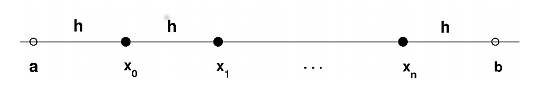 

**_Uzavreté_** ($n+1$-bodové) **_Newtonove-Cotesove formule_** majú uzly v tvare $x_i=x_0+ih$, $i=0,1,\ldots,n$, kde $h=(b-a)/n$ a $x_0=a$.

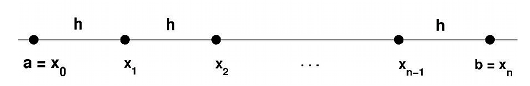 

---

--- 

#### <font color=blue> Príklad 3 </font>  

Vezmime $a=0$, $b=1$ a $n=3$. Potom otvorené uzly sú $x_0=0.2$, $x_1=0.4$, $x_2=0.6$, $x_3=0.8$, zatiaľ čo uzavreté uzly sú $x_0=0$, $x_1=1/3$, $x_2=2/3$, $x_3=1$. 

---

## 1. spôsob odvodenia váh $\alpha_j$

Tento prístup vyžaduje (predpokladá), že formula v Poznámke 1 je exaktná pre polynómy až do stupňa $n$, tzn. pre všetky polynómy $p(x)$ stupňa nie viac ako $n$ (t. j. $p\in P^n$), platí 

\begin{equation*} \label{eq:Deriv1NewtCotExaCond} \tag{6} 
I(p)=Q(p).  
\end{equation*}

Uvažujme nasledovné 

\begin{align*}
R(f) = & I(f) - Q(f) \\
     = & I(f) - I(p) + Q(p) - Q(f), \quad \text{ pre ľubovoľné } p\in P^n \\ 
     = & I(f-p) + Q(p-f) \\ 
     = & \displaystyle\int_{a}^{b}\left(f(x)-p(x)\right)\,\mathrm{d}x + (b-a)\displaystyle\sum\limits_{j=0}^{n}\alpha_j\left(p(x_j)-f(x_j)\right).
\end{align*} 

Preto pre každé $p\in P^n$ platí 

$$\left|R(f)\right|\le\left((b-a)+(b-a)\displaystyle\sum\limits_{j=0}^{n}|\alpha_j|\right)\underset{a\le x \le b}{\max}|f(x)-p(x)|.$$ 

Teda, ak $I(p)=Q(p)$ a $f$ je hladká funkcia, tak vďaka poznatkom o aproximácii polynómami vieme, že chyba $|R(f)|$ môže byť vcelku malá. 

Otázka teraz znie, či podmienka \eqref{eq:Deriv1NewtCotExaCond} jednoznačne určuje váhy $\alpha_j$ ? Uvažujme najprv uzavreté Newtonove-Cotesove vzorce pre $n=3$ s $a=0$, $b=1$. Potom  

$$Q(f)=\alpha_0f(0)+\alpha_1f(1/3)+\alpha_2f(2/3)+\alpha_3f(1)$$

je exaktná formula pre $f(x)\in\left\{1,x,x^2,x^3\right\}$. To vedie k sústave lineárnych rovníc 

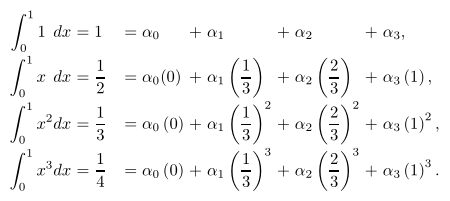 

Vyriešením získame $\alpha_0=1/8$, $\alpha_1=3/8$, $\alpha_2=3/8$, $\alpha_3=1/8$. 


Vo všeobecnosti vznikne (na intervale $\langle0,1\rangle$) systém lineárnych rovníc $\mathbf{A}\mathbf{\alpha}=\mathbf{b}$, kde 

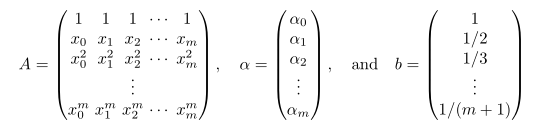 

Všimnime si, že $\mathbf{A}$ je vlastne transponovaná Vandermondova matica, ktorá vzniká ako matica sústavy rovníc pri hľadaní koeficientov interpolačného polynómu s uzlami $x_i$. Teda matica $\mathbf{A}$ je regulárna, keďže $x_j\neq x_k$ pre $j\neq k$. 

## 2. spôsob odvodenia váh $\alpha_j$

Tento prístup predpokladá, že formula v Poznámke 1 je exaktná pre Lagrangeov interpolačný polynóm funkcie $f$. Pripomeňme si interpoláciu Lagrangeovym polynómom $L$: 

$$f(x)=L(x)+R(x),$$ 

kde 

$$L(x)=\displaystyle\sum\limits_{j=0}^{n}f(x_j)l_j(x), \quad R(x)=\dfrac{f^{(n+1)}\left(\xi(x)\right)}{(n+1)!}\displaystyle\prod\limits_{i=0}^{n}(x-x_i), \quad a\le \xi(x) \le b, \quad l_j(x)=\displaystyle\prod\limits^{n}_{k=0\\ k\neq j}\dfrac{x-x_k}{x_j-x_k}.$$ 

Ďalej $f(x_i)=L(x_i)$, $i=0,1,\ldots,n$, kde $x_i$ sú buď otvorené alebo uzavreté uzly. Uvažujme teraz 

\begin{align*} 
I(f) = & \displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x = \displaystyle\int_{a}^{b}L(x)\,\mathrm{d}x + \displaystyle\int_{a}^{b}R(x)\,\mathrm{d}x \\ 
     = & \displaystyle\sum\limits_{j=0}^{n}f(x_j)\displaystyle\int_{a}^{b}l_j(x)\,\mathrm{d}x + \displaystyle\int_{a}^{b}R(x)\,\mathrm{d}x \\ 
     = & \displaystyle\sum\limits_{j=0}^{n}f(x_j)\alpha_j + R(f). 
\end{align*}

A už len stačí definovať nasledovné: 

$$Q(f)=\displaystyle\sum\limits_{j=0}^{n}\alpha_jf(x_j), \quad \alpha_j=\displaystyle\int_{a}^{b}l_j(x)\,\mathrm{d}x, \quad R(f)=\displaystyle\int_{a}^{b}R(x)\,\mathrm{d}x.$$

--- 

#### <font color=blue> Príklad 4 </font> 

Uvažujme uzavreté Newtonove-Cotesove vzorce na intervale $\langle 0,1 \rangle$ pre $n=3$. Tým pádom máme $x_0=0$, $x_1=1/3$, $x_2=2/3$, $x_3=1$. Potom 

$$\alpha_0=\displaystyle\int_{0}^{1}l_0(x)\,\mathrm{d}x=\displaystyle\int_{0}^{1}\dfrac{(x-x_1)(x-x_2)(x-x_3)}{(x_0-x_1)(x_0-x_2)(x_0-x_3)}\,\mathrm{d}x=-\dfrac{9}{2}\displaystyle\int_{0}^{1}\left(x^3-2x^2+\dfrac{11}{9}x-\dfrac{2}{9}\right)\,\mathrm{d}x=\dfrac{1}{8}.$$ 

Podobne dostaneme $\alpha_1=3/8$, $\alpha_2=3/8$, $\alpha_3=1/8$. Preto platí 

$$\displaystyle\int_{0}^{1}f(x)\,\mathrm{d}x\approx\dfrac{1}{8}f(0)+\dfrac{3}{8}f\left(\dfrac{1}{3}\right)+\dfrac{3}{8}f\left(\dfrac{2}{3}\right)+\dfrac{1}{8}f(1).$$

Konkrétne môžeme vziať napr. $f(x)=e^x$ a dostaneme: 

$$\displaystyle\int_{0}^{1}e^x\,\mathrm{d}x=e^1-1\approx\dfrac{1}{8}e^0+\dfrac{3}{8}e^{1/3}+\dfrac{3}{8}e^{1/3}+\dfrac{1}{8}e^1\approx 1.71854.$$


In [49]:
from scipy.integrate import newton_cotes 

a = 0 
b = 1 
n = 3
x = np.linspace(a, b, n+1)
f = np.exp(x)
an, B = newton_cotes(n, 1) # vrati koeficienty a tiez jednu zlozku chyboveho clena  
alpha = an/n # pozor! koeficienty formule nezodpovedaju uplne presne nasim koeficientom (viac detailov v dokumentacii) 
print('koeficienty alpha_i: ', alpha) 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.newton_cotes.html 
quad = (b-a) * np.sum(alpha * f) # priblizny vypocet integralu podla Pozn. 1 s najdenymi vahami (uzavrety Newton-Cotes)
print('priblizna hodnota integralu: ', quad) 
exact = np.exp(1)-1 
print('presna hodnota integralu: ', exact) 
error = abs(exact-quad)
print('chyba numerickej kvadratury: ', error) 

koeficienty alpha_i:  [0.125 0.375 0.375 0.125]
priblizna hodnota integralu:  1.7185401533601676
presna hodnota integralu:  1.718281828459045
chyba numerickej kvadratury:  0.0002583249011225419


--- 

<font color=orange> Použite zloženú kvadratúrnu formulu spolu so 4-bodovou Newtonovou-Cotesovou metódou ako v Príklade 4 a pokúste sa tak spresniť výsledok numerickej integrácie v Príklade 4. </font> 

<font color=purple> EXTRA: Naprogramujte (všeobecnú) funkciu pre približný výpočet integrálov pomocou uzavretých Newtonovych-Cotesovych vzorcov. Správny a okomentovaný kód, spolu s testovacími príkladmi môže byť odmenený 1 bonusovým bodom. </font>

### Odhad veľkosti chyby  



Poďme detailnejšie preskúmať chybový člen $R(f)$. Pripomeňme, že 

$$R(f)=\displaystyle\int_{a}^{b}R(x)\,\mathrm{d}x=\displaystyle\int_{a}^{b}\displaystyle\prod\limits_{i=0}^{n}(x-x_i)\dfrac{f^{(n+1)}\left(\xi(x)\right)}{(n+1)!}\,\mathrm{d}x.$$

<ins> Prípad 1: </ins> $\quad\displaystyle\prod\limits_{i=0}^{n}(x-x_i)$ môže ale nemusí meniť znamienko na $\langle a,b \rangle$. 

Zrejme 

\begin{align*}
|R(f)| = & \left|\displaystyle\int_{a}^{b}\displaystyle\prod\limits_{i=0}^{n}(x-x_i)\dfrac{f^{(n+1)}\left(\xi(x)\right)}{(n+1)!}\,\mathrm{d}x\right| \\ 
       \le & \dfrac{\parallel f^{(n+1)} \parallel_{\infty}}{(n+1)!}\displaystyle\int_{a}^{b}\left|\displaystyle\prod\limits_{i=0}^{n}(x-x_i)\right|\,\mathrm{d}x, 
\end{align*}

kde 

$$\parallel f^{(n+1)} \parallel_{\infty}=\underset{a\le x \le b}{\max}\left|f^{(n+1)}(x)\right|$$ 

Ďalej urobíme substitúciu 

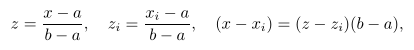

čím dostaneme 

$$|R(f)|\le\dfrac{\parallel f^{(n+1)} \parallel_{\infty}}{(n+1)!}(b-a)^{n+2}\displaystyle\int_{0}^{1}\left|\displaystyle\prod\limits_{i=0}^{n}(z-z_i)\right|\,\mathrm{d}z.$$

Preto 

\begin{equation*} \label{eq:NewtCotErr} \tag{7} 
|R(f)|\le (b-a)^{n+2}\beta^{*}_{n+1}\dfrac{\parallel f^{(n+1)} \parallel_{\infty}}{(n+1)!},  
\end{equation*}

pričom 

$\beta_{n+1}^{*}=\displaystyle\int_{0}^{1}\left|\displaystyle\prod\limits_{i=0}^{n}(z-z_i)\right|\,\mathrm{d}z$.

<ins> Prípad 2: </ins> $\quad\displaystyle\prod\limits_{i=0}^{n}(x-x_i)$ nemení znamienko na $\langle a,b \rangle$.

Vďaka Vete o strednej hodnote pre integrály máme 

$$R(f)=\dfrac{f^{(n+1)}(\xi')}{(n+1)!}\displaystyle\int_{a}^{b}\prod_{i=0}^{n}(x-x_i)\,\mathrm{d}x,$$ 

pre nejaké $\xi$, $a \le \xi \le b$. 

Preto 

$$R(f)=\dfrac{f^{(n+1)}(\xi')}{(n+1)!}(b-a)^{n+2}\displaystyle\int_{0}^{1}\displaystyle\prod\limits_{i=0}^{n}(z-z_i)\,\mathrm{d}z$$ 

a 

\begin{equation*} \label{eq:NewtCotErr2} \tag{8} 
R(f)=(b-a)^{n+2}\dfrac{f^{(n+1)}(\xi')}{(n+1)!}\beta_{n+1},  
\end{equation*} 

kde 

$$\beta_{n+1}=\displaystyle\int_{0}^{1}\displaystyle\prod\limits_{i=0}^{n}(z-z_i)\,\mathrm{d}z.$$

--- 

#### <font color=blue> Príklad 5 </font> 

Vezmime $m=1$, $x_0=a$, $x_1=b$ a uzavreté Newtonove-Cotesove vzorce. Potom platí 

\begin{align*} 
I(f) = & \displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x=Q(f) + R(f) \\ 
     = & \displaystyle\sum\limits_{j=0}^{n}f(x_j)\displaystyle\int_{a}^{b}l_j(x)\,\mathrm{d}x + \displaystyle\int_{a}^{b}(x-a)(x-b)\dfrac{f''(\xi)}{2!}\,\mathrm{d}x. 
\end{align*}

Preto 

$$Q(f)=f(a)\displaystyle\int_{a}^{b}\dfrac{x-b}{a-b}\,\mathrm{d}x+f(b)\displaystyle\int_{a}^{b}\dfrac{x-a}{b-a}\,\mathrm{d}x=\left(f(a)+f(b)\right)\dfrac{b-a}{2} \quad \text{ (lichobežníkové pravidlo) }.$$ 

Ďalej máme 

$$R(f)=\dfrac{f''(\xi')}{2}\displaystyle\int_{a}^{b}(x-a)(x-b)\,\mathrm{d}x,$$ 

keďže $(x-a)(x-b)\le0$ pre $a \le x \le b$. 

Tým pádom 

$$R(f)=-\dfrac{1}{12}(b-a)^3f''(\xi')$$

a odtiaľ dostávame 

$$\displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x=\dfrac{b-a}{2}\left[f(a)+f(b)\right]-\dfrac{1}{12}(b-a)^3f''(\xi').$$

---

--- 

#### <font color=blue> Príklad 6 </font> 

Uvažujme $m=0$, $x_0=(a+b)/2$ a otvorené Newtonove-Cotesove vzorce. Aplikovaním Lagrangeovej polynomiálnej procedúry je možné ukázať, že chyba pre toto pravidlo bude úmerná $H^2$, kde $H=b-a$. Avšak lepší výsledok je možné dosiahnúť rozvojom funkcie $f$ do Taylorovho radu v okolí $x_0$: 

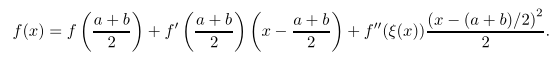 

A teda máme 

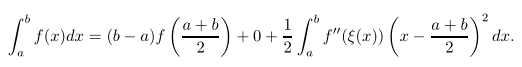 

Odtiaľ ďalej dostávame 

\begin{align*}
I(f) = & \displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x=Q(f)+\dfrac{1}{2}f''(\xi^*)\displaystyle\int_{a}^{b}\left(x-\dfrac{a+b}{2}\right)^2\,\mathrm{d}x \\ 
     = & Q(f)+\dfrac{1}{24}(b-a)^3f''(\xi^*)
\end{align*} 

pre nejaké $\xi^*$, $a \le \xi^* \le b$ (Veta o strednej hodnote pre integrály), pričom  

\begin{equation*} \label{eq:MidPointRule} \tag{9} 
Q(f)=(b-a)f\left(\dfrac{a+b}{2}\right) \quad \text{(obdĺžnikové pravidlo)}.   
\end{equation*}

Pre toto pravidlo máme 

$$R(f)=\dfrac{1}{24}H^3f''(\xi^*).$$

---

---

#### Poznámka 6

Ako je naznačené v Príklade 6, analýzu chýb je možné vylepšiť pre určité Newtonove-Cotesove formule. Dá sa odvodiť nasledovné: 

1) Pre uzavreté Newtonove-Cotesove vzorce: 


  * $n$ párne: $R(f)=\dfrac{(b-a)^{n+3}f^{(n+2)}(\xi)}{n^{n+3}(n+2)!}\displaystyle\int_{0}^{n}t^2(t-1)\ldots(t-m)\,\mathrm{d}t$; 
  
  
  * $n$ nepárne: $R(f)=\dfrac{(b-a)^{n+2}f^{(n+1)}(\xi)}{n^{n+2}(n+1)!}\displaystyle\int_{0}^{n}t(t-1)\ldots(t-m)\,\mathrm{d}t$. 
  
  
2) Pre otvorené Newtonove-Cotesove vzorce: 


  * $n$ párne: $R(f)=\dfrac{(b-a)^{n+3}f^{(n+2)}(\xi)}{(n+2)^{n+3}(n+2)!}\displaystyle\int_{-1}^{n+1}t^2(t-1)\ldots(t-m)\,\mathrm{d}t$; 
  
  
  * $n$ nepárne: $R(f)=\dfrac{(b-a)^{n+2}f^{(n+1)}(\xi)}{(n+2)^{n+2}(n+1)!}\displaystyle\int_{-1}^{n+1}t(t-1)\ldots(t-m)\,\mathrm{d}t$.


Vo všetkých vyššie uvedených vzorcoch je $a\le \xi \le b$. 

---

---

#### Poznámka 7 

Z predchádzajúcej poznámky vyplýva, že rád presnosti Newtonovych-Cotesovych vzorcov je $n+1$ pre $n$ párne a je $n$ pre $n$ nepárne. 

---

**Sumarizácia známych Newtonovych-Cotesovych vzorcov.** 


1) Uzavreté Newtonove-Cotesove vzorce: 


  * $n=1$: **lichobežníková formula $Q_T(f)$** (ang. *trapezoidal rule*) - vznikne integráciou lineárneho interpolačného polynómu, ktorý prechádza bodmi $[a;f(a)]$, $[b;f(b)]$, v medziach od $a$ do $b$;  
  
  $$I(f)=\displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x=Q_T(f)+R_T(f),$$ 
  
  kde 
  
  \begin{equation*} \label{eq:TrapezRule2} \tag{10} 
   Q_T(f)=\displaystyle\int_{a}^{b}L_1(x)\,\mathrm{d}x=\dfrac{b-a}{2}\left[f(a)+f(b)\right]   
  \end{equation*}
 
  a
  
  \begin{equation*} \label{eq:TrapezRuleErr2} \tag{11} 
   R_T(f)=-\dfrac{1}{12}f''(\xi)(b-a)^3,\quad \xi\in\langle a,b \rangle;   
  \end{equation*}
  
  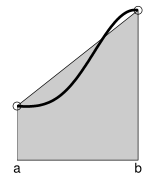 
  
  
  * $n=2$: **Simpsonova formula $Q_S(f)$** - vznikne integráciou kvadratického Lagrangeovho polynómu, ktorý prechádza bodmi $[a;f(a)]$, $\left[\frac{a+b}{2};f\left(\frac{a+b}{2}\right)\right]$, $[b;f(b)]$; 
  
  $$I(f)=\displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x=Q_S(f)+R_S(f),$$ 
  
  kde 
  
  \begin{equation*} \label{eq:SimpsonRule} \tag{12} 
   Q_S(f)=\displaystyle\int_{a}^{b}L_2(x)\,\mathrm{d}x=\dfrac{b-a}{6}\left[f(a)+4f\left(\dfrac{a+b}{2}\right)+f(b)\right];   
  \end{equation*}
  
  a
  
  \begin{equation*} \label{eq:SimpsonRuleErr} \tag{13} 
   R_S(f)=-\dfrac{1}{90}f^{(4)}(\xi)\left(\dfrac{b-a}{2}\right)^5,\quad \xi\in\langle a,b \rangle.   
  \end{equation*}
  
  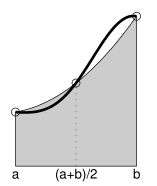 
  
2) Otvorené Newtonove-Cotesove vzorce: 


  * $n=0$: **obdĺžniková formula Q_M(f)** (ang. *midpoint rule*) - vznikne integráciou Lagrangeovho polynómu $L_0(x)$ s jediným uzlom $\frac{1}{2}(a+b)$; 
  
  $$I(f)=\displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x=Q_M(f)+R_M(f),$$ 
  
  kde 
  
  \begin{equation*} \label{eq:MidPointRule2} \tag{14} 
   Q_M(f)=\displaystyle\int_{a}^{b}L_0(x)\,\mathrm{d}x=(b-a)f\left(\dfrac{a+b}{2}\right);   
  \end{equation*} 
  
  a 
  
  \begin{equation*} \label{eq:MidPointRuleErr2} \tag{15} 
   R_M(f)=\dfrac{1}{24}f''(\xi)(b-a)^3,\quad \xi\in\langle a,b \rangle;   
  \end{equation*}
  
  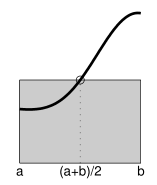 
  
  * $n=1$: **dvojbodová otvorená formula**; 
  
  \begin{equation*} \label{eq:TwoPointOpenRule} \tag{16} 
   Q(f)=\dfrac{b-a}{2}\left[f\left(a+\dfrac{b-a}{3}\right)+f\left(a+2\left(\dfrac{b-a}{3}\right)\right)\right];   
  \end{equation*} 
  
  \begin{equation*} \label{eq:TwoPointOpenRuleErr} \tag{17} 
   R(f)=\dfrac{1}{36}f''(\xi)(b-a)^3,\quad \xi\in\langle a,b \rangle.   
  \end{equation*}


---

#### Poznámka 8

V skutočnosti je možné nájsť funkciu $f\in C\langle a,b \rangle$ takú, že $R(f)=I(f)-Q(f)$ nejde k nule pre $n\to\infty$. **Vo všeobecnosti sa teda odporúča používať zložené kvadratúrne formule, keď sa pracuje s Newtonovymi-Cotesovymi vzorcami.**  

---

## Zložené formule 

Spomeňme si (téma 2), že interpolačné polynómy vysokého stupňa robili pri aproximácii funkcií niekedy problémy (napr. Rungeho jav). Jedným z možných riešení bolo rozdelenie intervalu na menšie podintervaly a nájdenie interpolačného polynómu na každom podintervale zvlášť. Analogická myšlienka sa uplatní aj tu ale pre numerické kvadratúry, keďže Newtonove-Cotesove vzorce sú založené na integrovaní Lagrangeovho interpolačného polynómu.  

Uvedieme zložené formule iba pre prípad, keď sú jednoduché formule na podintervaloch všetky rovnaké a to buď obdĺžnikové alebo lichobežníkové alebo Simpsonove. Budeme uvažovať ekvidištantné delenie intervalu $\langle a,b \rangle$, tzn. $x_i=a+ih$, kde $h=(b-a)/n$. 

* **Zložená obdĺžniková formula** - vznikne súčtom jednoduchých obdĺžnikových formulí na jednotlivých podintervaloch $\langle x_{i-1},x_i\rangle$. Výsledkom je formula v tvare 

\begin{equation*} \label{eq:CompMidPointForm} \tag{18} 
   Q_M^n(f)=h\left[f_{1/2}+f_{3/2}+\ldots+f_{n-1/2}\right], \quad \text{kde } f_{i-1/2}=f\left(x_i-\frac{1}{2}h\right);   
\end{equation*}

pre chybu platí 

\begin{equation*} \label{eq:CompMidPointFormErr} \tag{19} 
   R_M^n(f)=\dfrac{1}{24}h^3\displaystyle\sum\limits_{i=1}^{n}f''(\xi_i)=\dfrac{h^2(b-a)}{24n}\displaystyle\sum\limits_{i=1}^{n}f''(\xi_i)=\dfrac{b-a}{24}f''(\xi)h^2, \quad \text{kde } \xi\in\langle a,b \rangle.
\end{equation*}

* **Zložená lichobežníková formula** - bola uvedená na začiatku tohto učebného textu vrátane jej chyby, viď vzťahy $(1)$, $(2)$. 


* **Zložená Simpsonova formula** - vznikne tak, že pre párny počet dielikov $n$, sčítame jednoduché Simpsonove formule na intervaloch $\langle x_0,x_2 \rangle, \langle x_2,x_4 \rangle, \ldots, \langle x_{n-2},x_n \rangle$. Takto dostaneme formulu v tvare 

\begin{equation*} \label{eq:CompSimpsForm} \tag{20} 
   Q_S^n(f)=\dfrac{2h}{6}\left[f_0+4f_1+f_2\right]+\dfrac{2h}{6}\left[f_2+4f_3+f_4\right]+\ldots+\dfrac{2h}{6}\left[f_{n-4}+4f_{n-3}+f_{n-2}\right]+\dfrac{2h}{6}\left[f_{n-2}+4f_{n-1}+f_{n}\right]=\dfrac{h}{3}\left[f_0+4f_1+2f_2+4f_3+2f_4+\ldots+2f_{n-2}+4f_{n-1}+f_n\right], \quad \text{kde } f_{i}=f\left(x_i\right);   
\end{equation*}
  
pre chybu platí 

\begin{equation*} \label{eq:CompSimpsFormErr} \tag{21} 
   R_S^n(f)=-\dfrac{1}{90}h^5f^{(4)}(\xi_2)-\dfrac{1}{90}h^5f^{(4)}(\xi_4)-\ldots-\dfrac{1}{90}h^5f^{(4)}(\xi_n)=-\dfrac{1}{90}h^4\dfrac{b-a}{2}\dfrac{2}{n}\left[f^{(4)}(\xi_2)+f^{(4)}(\xi_4)+\ldots+f^{(4)}(\xi_n)\right]= \\ 
   -\dfrac{b-a}{180}f^{(4)}(\xi)h^4, \quad \text{kde } \xi\in\langle a,b \rangle.
\end{equation*} 
  
  

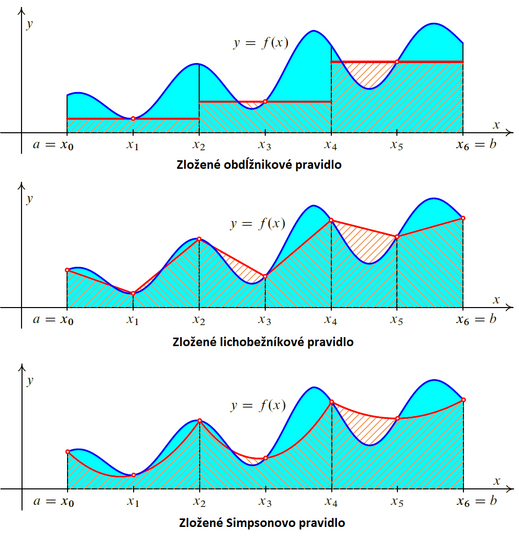 

***
<a id=gauss></a>
 # <font color=brown> Gaussova kvadratúra </font> 

Videli sme, že Newtonove-Cotesove vzorce je možné odvodiť tak, že zvolíme ekvidištantné deliacie body (uzly) $x_i$, $0\le i \le n$ v intervale $\langle a,b \rangle$ a zvolíme váhy $\alpha_i$, $0\le i \le n$ tak, aby numerická kvadratúra bola exaktná pre polynóm najvyššieho možného stupňa. Taktiež sme videli, že pri $n+1$ uzloch, pre $n$ nepárne, je rád presnosti Newtonovych-Cotesovych vzorcov $n$ a pre párne $n$ je rád presnosti $n+1$. 

V tejto časti predstavíme tzv. *Gaussovu kvadratúru*, v ktorej **sú uzly $x_i$ aj váhy $\alpha_i$, $0\le i \le n$ súčasne vyberané tak, aby kvadratúrna formula bola exaktná pre polynóm najvyššieho možného stupňa. Ako uvidíme, povedie to k vzorcom, ktoré budú mať rád presnosti $2n+1$ pri $n+1$ uzloch. Uzly vo všeobecnosti nebudú ekvidištantné.**  

Začneme ilustračným príkladom a potom si ukážeme sofistikovanejší spôsobob ako určiť potrebné uzly aj váhy pre uvažovanú kvadratúru. 

--- 

#### <font color=blue> Príklad 7 </font> 

Vezmime $I(f)=\displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x$ a $n=1$. Vhodnou substitúciou prevedieme integráciu na interval $\langle -1,1 \rangle$ nasledovne: 

$$I(f)=\displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x=\displaystyle\int_{-1}^{1}\dfrac{b-a}{2}f\left(\dfrac{z(b-a)+a+b}{2}\right)\,\mathrm{d}z=\displaystyle\int_{-1}^{1}g(z)\,\mathrm{d}z=I(g),$$ 

kde $z=\dfrac{2x-a-b}{b-a}$. 

V zmysle vyššie naznačených myšlienok chceme nájsť koeficienty $\alpha_0,\alpha_1,z_1,z_2$ (presnejšie váhy aj uzly) také, aby platilo $Q(g)=I(g)$ pre polynóm najvyššieho možného stupňa. Položme $g(z)=1$, $g(z)=z$, $g(z)=z^2$, $g(z)=z^3$ a dostaneme (podľa $(3)$ resp. podľa Poznámky 1) nasledujúci systém nelineárnych rovníc 

\begin{align*}
\displaystyle\int_{-1}^{1}1\,\mathrm{d}z & = 2 = \alpha_0 + \alpha_1 \\ 
\displaystyle\int_{-1}^{1}z\,\mathrm{d}z & = 0 = \alpha_0z_0 + \alpha_1z_1 \\ 
\displaystyle\int_{-1}^{1}z^2\,\mathrm{d}z & = \frac{2}{3} = \alpha_0z_0^2+\alpha_1z_1^2 \\ 
\displaystyle\int_{-1}^{1}z^3\,\mathrm{d}z & = 0 = \alpha_0z_0^3+\alpha_1z_1^3. 
\end{align*}

Vyriešením uvedenej sústavy rovníc dostaneme $\alpha_0=\alpha_1=1$, $z_0=-1/\sqrt{3}$, $z_1=1/\sqrt{3}$, čo sú vlastne váhy a uzly dvojbodovej Gaussovej kvadratúry. Preto máme 

$$\displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x\approx\dfrac{b-a}{2}\left[\alpha_0f\left(\dfrac{z_0(b-a)+a+b}{2}\right)+\alpha_1f\left(\dfrac{z_1(b-a)+a+b}{2}\right)\right].$$


'Eq1: '

'Eq2: '

'Eq3: '

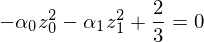

'Eq4: '

In [23]:
sym.init_printing(use_latex=True)
z, z0, z1 = sym.symbols('z, z0 z1')
a0, a1 = sym.symbols('alpha0 alpha1')
I1 = sym.integrate(1, (z, -1, 1))
I2 = sym.integrate(z, (z, -1, 1))
I3 = sym.integrate(z**2, (z, -1, 1))
I4 = sym.integrate(z**3, (z, -1, 1))
Eq1 = sym.Eq(I1-a0-a1)
Eq2 = sym.Eq(I2-a0*z0-a1*z1)
Eq3 = sym.Eq(I3-a0*z0**2-a1*z1**2)
Eq4 = sym.Eq(I4-a0*z0**3-a1*z1**3)
display("Eq1: ",Eq1)
display("Eq2: ",Eq2)
display("Eq3: ",Eq3)
display("Eq4: ",Eq4)
sol = list(sym.nonlinsolve([Eq1, Eq2, Eq3, Eq4], [a1, a2, z0, z1]))
display(sol) # niekedy sa moze stat, ze SymPy riesenie nenajde :-( alebo je potrebna este nejaka uprava vyrazov v rovniciach  

--- 

Zaoberajme sa teraz výpočtom 

$$\displaystyle\int_{a}^{b}w(x)f(x)\,\mathrm{d}x,$$ 

kde $w$ je pevne daná nezáporná **_váhová funkcia_** na intervale $\langle a,b \rangle$. Interval $\langle a,b \rangle$ môže byť aj neohraničený, napr. $\langle 0,\infty)$ alebo $(-\infty,\infty)$. O váhovej funkcii budeme predpokladať nasledovné: 

\begin{align*} \label{ls:WeightFunctionConditions} \tag{22}
& (a)\, w\, \text{ je nezáporná a spojitá na }\, \langle a,b \rangle; \\
\\
& (b)\, \text{ integrály }\, \displaystyle\int_{a}^{b}w(x)x^k\,\mathrm{d}x,\, k=0,1,\ldots\, \text{ existujú a sú konečné }; \\ 
\\ 
& (c)\, \text{ ak }\, p\, \text{ je polynóm nezáporný na intervale }\, \langle a,b \rangle\, \text{ a } \,  \displaystyle\int_{a}^{b}w(x)p(x)\,\mathrm{d}x=0,\, \text{ tak } \, p=0.
\end{align*}

Podmienky \eqref{ls:WeightFunctionConditions} sú splnené napr. vtedy, keď je funkcia $w$ kladná a spojitá na ohraničenom uzavretom intervale $\langle a,b \rangle$. 

Pomocou Vety o strednej hodnote integrálu je možné ukázať, že podmienka $(22c)$ je ekvivalentná s podmienkou $\displaystyle\int_{a}^{b}w(x)\,\mathrm{d}x>0$. 


--- 

### <font color=red> Definícia 3 </font> 
 
Nech $L_n(x)=\displaystyle\sum\limits_{i=0}^{n}f(x_i)l_i(x)$ je Lagrangeov interpolačný polynóm funkcie $f(x)$. **_Vážená interpolačná kvadratúrna formula_** je definovaná predpisom 

\begin{align*} \label{eq:WeightInterpQuadForm} \tag{23}
Q(f)=\displaystyle\int_{a}^{b}w(x)L_n(x)\,\mathrm{d}x=\displaystyle\sum\limits_{i=0}^{n}w_if(x_i), 
\end{align*}

kde koeficienty $w_i=\displaystyle\int_{a}^{b}w(x)l_i(x)\,\mathrm{d}x$, $i=0,1,\ldots,n$. 

---

Pre $a\le x_0<x_1<\ldots<x_n\le b$ je $Q(f)$ vo všeobecnosti iba rádu $n$, tzn. $Q(x^i)=\displaystyle\int_{a}^{b}w(x)x^i\,\mathrm{d}x$ pre $0\le i \le n$. Avšak vhodnou voľbou uzlov je možné rád formule $(24)$ výrazne zvýšiť. K tomu sa využijú tzv. **_ortogonálne polynómy_**. 

--- 

### <font color=red> Definícia 4 </font> 
 
Nech je daný (vektorový) priestor (reálnych) funkcií takých, že integrál $\displaystyle\int_{a}^{b}w(x)f^2(x)\,\mathrm{d}x$ existuje a je konečný. Pre funkcie $u$, $v$ z tohto priestoru definujeme **_(vážený) skalárny súčin_** vzťahom 

$$(u,v)=\displaystyle\int_{a}^{b}w(x)u(x)v(x)\,\mathrm{d}x,$$ 

pričom $w(x)$ je tzv. váhová funkcia. 

---

--- 

### <font color=red> Definícia 5 </font> 
 
Je daný systém polynómov $\left\{p_n(x)\right\}_{n=0}^{\infty}$ stupňov $n$. Hovoríme, že tento systém je na intervale $\langle a,b \rangle$ **_ortogonálny_**, keď platí 

$$(p_i,p_j)=0,\quad \text{pre } i\neq j.$$

---

**Ku konštrukcii ortogonálnych polynómov sa využíva rekurentný vzťah** 

\begin{align*} \label{eq:RecurFormOrthogPolynom} \tag{24}
p_{i+1}(x)=(x-\alpha_i)p_i(x)-\beta_ip_{i-1}(x),\quad i=1,2,\ldots, 
\end{align*} 

pričom kladieme $p_0(x)=1$, $p_1(x)=x-\alpha_0$. 

Koeficienty $\alpha_0,\alpha_1,\beta_1,\ldots,\alpha_i,\beta_i,\ldots$ sú zvolené tak, aby polynómy $p_0,p_1,\ldots,p_{i+1}$ boli ortogonálne. Koeficient $\alpha_0$ sa určí z podmienky $0=(p_1,p_0)=(x-\alpha_0,p_0)$. Ďalej **sa postupuje indukciou**, tzn. predpokladáme, že $\left(p_i,x^k\right)=0$ pre $k<i$ a určíme $\alpha_i,\beta_i$. Požadujeme, aby platilo 

$$0=(p_{i+1},p_i)=\left((x-\alpha_i)p_i,p_i\right)-\beta_i(p_{i-1},p_{i})=(xp_i,p_{i})-\alpha_i(p_{i},p_{i})-\beta_i(p_{i-1},p_i),$$ 

a keďže podľa indukčného predpokladu je $(p_{i-1},p_i)=0$, tak máme 

$$\alpha_i=\dfrac{(xp_i,p_i)}{(p_i,p_i)}.$$ 

Podobne z požiadavky 

$$0=(p_{i+1},p_{i-1})=((x-\alpha_i)p_i,p_{i-1})-\beta_i(p_{i-1},p_{i-1})=(xp_i,p_{i-1})-\beta_i(p_{i-1},p_{i-1})$$ 

dostaneme 

$$\beta_{i}=\dfrac{(xp_i,p_{i-1})}{(p_{i-1},p_{i-1})}.$$ 

Tento vzťah ešte upravíme pomocou rovnosti 

$$(p_i,p_i)=((x-\alpha_{i-1})p_{i-1},p_i)-\beta_{i-1}(p_{i-2},p_i)=(xp_{i-1},p_i)$$

na výsledný tvar 

$$\beta_i=\dfrac{(p_i,p_i)}{(p_{i-1},p_{i-1})}.$$ 

Jednoducho sa overí, že $(p_{i+1},p_k)=0$ aj pre $k\le i-2$, takže celkovo $(p_{i+1},p_k)=0$ pre $k\le i$. Tým pádom tiež platí, že $\left(p_{i+1},x^k\right)=0$, $k\le i$, lebo $x^k$ sa dá vyjadriť ako lineárna kombinácia polynómov $p_l(x)$, $l\le k$. Týmto je indukčný krok ukončený. 

**A teda koeficienty ortogonálnych polynómov $p_i$ sa vyrátajú podľa nasledujúcich vzťahov:** 

\begin{align*} \label{eq:CoefFormOrthogPolynom} \tag{25}
\alpha_i=\dfrac{(xp_i,p_i)}{(p_i,p_i)}, \quad i=0,1,\ldots, \qquad \beta_i=\dfrac{(p_i,p_i)}{(p_{i-1},p_{i-1})}, \quad i=1,2,\ldots 
\end{align*}

--- 

### <font color=green> Veta 3  </font> 

Korene $x_i$, $i=1,2,\ldots,n$, $n$-tého ortogonálneho polynómu $p_n$ sú reálne, jednoduché a všetky ležia v otvorenom intervale $(a,b)$. 

---

--- 

### <font color=red> Definícia 6 </font> 

Nech je daný systém ortogonálnych polynómov $\left\{p_n(x)\right\}_{n=0}^{\infty}$ stupňov $n$.

**_Gaussova interpolačná formula_** 

\begin{align*} \label{eq:GaussQuadForm} \tag{26}
Q_{Gn}(f)=\displaystyle\sum\limits_{i=0}^{n}w_if(x_i)
\end{align*}

je interpolačná kvadratúrna formula typu $(23)$, pričom jej uzly $\{x_i\}_{i=0}^{n}$ sú korene $(n+1)$-vého ortogonálneho polynómu $p_{n+1}$.  

---

--- 

#### <font color=green> Tvrdenie 1  </font> 

Gaussova kvadratúrna formula $Q_{Gn}$ je rádu $2n+1$.   

---

--- 

#### <font color=green> Tvrdenie 2  </font> 

Koeficienty Gaussovej kvadratúrnej formule $Q_{Gn}$ sú kladné. 

---

--- 

#### <font color=green> Tvrdenie 3  </font> 

Interpolačná kvadratúrna formula $Q$, ktorá integruje presne polynómy stupňov $0,1,\ldots,2n+1$, je Gaussova kvadratúrna formula $Q_{Gn}$. 

---

--- 

#### <font color=green> Dôsledok 1  </font> 

Gaussova kvadratúrna formula je interpolačná kvadratúrna formula maximálneho rádu. 

---

**Gaussova-Legendrova formula** - je určená pre výpočet $\displaystyle\int_{-1}^{1}f(x)\,\mathrm{d}x$. 

Polynómy ortogonálne na intervale $\langle -1,1 \rangle$ s váhou $w=1$ sú známe ako **_Legendrove polynómy_**. Dajú sa popísať rekurentným vzťahom 

\begin{align*} \label{eq:LegendrePolyRecur} \tag{27}
& (n+1)P_{n+1}(x)=(2n+1)xP_n(x)-nP_{n-1}(x), \quad n=1,2,\ldots \\ 
& \text{pričom kladieme}\quad P_0(x)=1, \quad P_1(x)=x. 
\end{align*}

Konkrétne teda $P_2(x)=\dfrac{1}{2}\left(3x^2-1\right)$, $P_3(x)=\dfrac{1}{2}\left(5x^3-3x\right)$. 

Všimnime si, že polynómy párneho stupňa obsahujú iba párne mocniny $x$ a polynómy nepárneho stupňa obsahuju iba nepárne mocniny $x$. Dá sa ukázať, že korene Legendrovych polynómov sú symetrické, t.j. ak $x_0<x_1<\ldots<x_n$, tak $x_{n-i}=-x_i$, $i=0,1,\ldots,n$. Pre $n$ párne je $x_{n/2}=0$. 

Gaussova kvadratúrna formula $(23)$, ktorej uzly sú korene Legendrovho polynómu $P_{n+1}$, sa nazýva **_Gaussova-Legendrova kvadratúrna formula_**. 

**Chyba Gaussovej-Legendrovej kvadratúrnej formule** sa dá vyjadriť v tvare 

\begin{align*} \label{eq:LegendrePolyFormErr} \tag{28}
R_{Gn}(f) = d_nf^{(2n+2)}(\eta_{Gn}), \quad \text{ kde } \eta_{Gn}\in(-1,1) \quad \text{ a } \quad d_n=\dfrac{2^{2n+3}\left[(n+1)!\right]^4}{(2n+3)\left[(2n+2)!\right]^3}. 
\end{align*} 

**Koeficienty $w_i$ pre Gaussove-Legendrove formule** je možné vypočítať integráciou Lagrangeových bázických polynómov podľa vzťahu $w_i=\displaystyle\int_{-1}^{1}l_i(x)\,\mathrm{d}x$. Výhodnejšie je však použiť vzorec 

\begin{align*} \label{eq:GaussLegendreWeights} \tag{29}
w_i=\dfrac{2}{\left(1-x_i^2\right)\left[P'_{n+1}(x_i)\right]^2}, \quad i=0,1,\ldots,n. 
\end{align*} 

**Vybrané Gaussove-Legendrove formule** 

Pre $n=0,1,2$ špeciálne dostaneme formule 

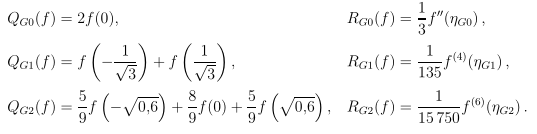 

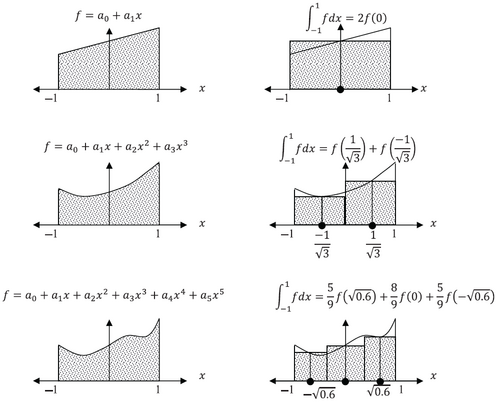  
[Zdroj](https://engcourses-uofa.ca/books/numericalanalysis/numerical-integration/gauss-quadrature/#lecture-video15).

Všimnime si, že $Q_{G0}(f)$ je vlastne obdĺžniková formula. Ďalej formula $Q_{G1}(f)$ integruje presne polynómy stupňa $3$, podobne ako Simpsonova formula. Zatiaľ čo Simpsonova formula $Q_S(f)$ je trojbodová, Gaussova-Legendrova formula $Q_{G1}(f)$ je iba dvojbodová. Ak porovnáme tvary chybových členov $R_S(f)$, $R_{Gn}(f)$ oboch zmienených kvadratúr, tak môžeme usúdiť, že Gaussova-Legendrova formula je približne o $50\%$ presnejšia. <br/> 
S rastúcim počtom uzlov vo formule $Q_{Gn}(f)$, koeficient $d_n$ vo vyjadrení chyby/zvyšku $R_{Gn}(f)$ prudko klesá - napr. pre 9 bodovú formulu $Q_{G8}(f)$ je $d_8\approx1.82\times10^{-21}$. Aby tiež samotná chyba $R_{Gn}(f)$ bola malá, musí byť integrovaná funkcia $f(x)$ z triedy $C^{2n+2}\langle -1,1 \rangle$ a hodnota jej $(2n+2)$-hej derivácie nesmie byť príliš veľká: platí totiž 

$$\left|R_{Gn}(f)\right|\le d_nM_{2n+2}, \quad \text{ kde } \quad M_{2n+2}=\underset{\eta\in\langle-1,1\rangle}{\max}\left|f^{(2n+2)}(\eta)\right|.$$ 

**Gaussove-Legendrove formule je vhodné použiť pre integrovanie na ľubovoľnom ohraničenom intervale $\langle a,b \rangle$, stačí totiž aplikovať nasledujúcu transformáciu** 

$$x=\dfrac{b-a}{2}y+\dfrac{a+b}{2},\,\dfrac{\mathrm{d}x}{\mathrm{\mathrm{d}y}}=\dfrac{b-a}{2} \quad x\in\langle a,b \rangle; \quad y\in\langle -1,1 \rangle,$$ 

**pomocou ktorej sa prevedie integrovanie z intervalu $\langle a,b \rangle$ na interval $\langle -1,1 \rangle$ a dostaneme** 

$$\displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x=\displaystyle\int_{-1}^{1}f\left(\dfrac{b-a}{2}y+\dfrac{a+b}{2}\right)\dfrac{b-a}{2}\,\mathrm{d}y,$$

**odkiaľ** 

$$\displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x\approx\dfrac{b-a}{2}\displaystyle\sum\limits_{i=1}^{n}w_if\left(\dfrac{b-a}{2}y_i+\dfrac{a+b}{2}\right).$$

--- 

#### <font color=blue> Príklad 8 </font>  

Ukážeme si, ako je možné v Pythone pomocou balíka *NumPy* získať uzly aj váhy pre Gaussovu-Legendrovu formulu. Uvedený balík má zabudované funkcie aj pre ďalšie dôležité triedy polynómov (pozri nižšie v texte). 

In [25]:
n = 1 # pocet uzlov 
[x, w] = np.polynomial.legendre.leggauss(n)
print('w\n',w) # vahy (koeficienty)
print('x\n',x) # uzly 

w
 [2.]
x
 [0.]


Gaussova-Legendrova formula s jedným uzlom je to isté, $\displaystyle\int_{-1}^{1}f(x)\,\mathrm{d}x\approx2f(0)$ čo obdĺžnikové pravidlo. 

In [26]:
n = 2 # pocet uzlov 
[x, w] = np.polynomial.legendre.leggauss(n)
print('w\n',w) # vahy (koeficienty)
print('x\n',x) # uzly 

w
 [1. 1.]
x
 [-0.57735027  0.57735027]


Pre dva uzly máme vzťah $\displaystyle\int_{-1}^{1}f(x)\,\mathrm{d}x\approx f(-0.57735027)+f(0.57735027)$. 

In [27]:
n = 3 # pocet uzlov 
[x, w] = np.polynomial.legendre.leggauss(n)
print('w\n',w) # vahy (koeficienty)
print('x\n',x) # uzly 

w
 [0.55555556 0.88888889 0.55555556]
x
 [-0.77459667  0.          0.77459667]


V prípade troch uzlov dostaneme $\displaystyle\int_{-1}^{1}f(x)\,\mathrm{d}x\approx 0.55555556f(-0.77459667)+0.88888889f(0)+0.55555556f(0.77459667)$ atď. 

--- 

**Gaussova-Chebysevova kvadratúrna formula** - je určená na výpočet $\displaystyle\int_{-1}^{1}\dfrac{f(x)}{\sqrt{1-x^2}}\,\mathrm{d}x$. 

Ortogonálne polynómy na intervale $\langle -1,1 \rangle$ s váhou $w(x)=\dfrac{1}{\sqrt{1-x^2}}$ sú tzv. **_Chebysevove polynómy_** (pozri tému 2 alebo [odkaz](https://en.wikipedia.org/wiki/Chebyshev_polynomials)). Formula $(23)$, ktorej uzly sú koreňmi Chebysevovho polynómu $T_{n+1}$, sa nazýva **_Gaussova-Chebysevova kvadratúrna formula_**. Uzly a koeficienty sú dané takto: 

\begin{align*} \label{eq:GaussChebysevFormWeightsNodes} \tag{30}
& x_i = \cos\left(\dfrac{2i+1}{2n+2}\pi\right); \\ 
& w_i=\dfrac{\pi}{n+1}; \\ 
& i =0,1,\ldots,n. 
\end{align*}

**Gaussova-Lagguerrova kvadratúrna formula** - umožnuje výpočet $\displaystyle\int_{0}^{\infty}e^{-x}f(x)\,\mathrm{d}x$. 

Ortogonálne polynómy na intervale $\langle 0,\infty)$ s váhou $w(x)=e^{-x}$ sú tzv. **_Laguerrove polynómy_** definované rekurentným predpisom 

\begin{align*} \label{eq:LaguerrPolyRecur} \tag{31}
L_0(x)=1, \quad L_1(x)=1-x, \quad L_{n+1}(x)=(2n+1-x)L_n(x)-n^2L_{n-1}(x), \quad n=1,2,\ldots 
\end{align*} 

Gaussova kvadratúrna formula $(23)$, ktorej uzly sú korene Laguerrovho polynómu $L_{n+1}$, sa nazýva **_Gaussova-Laguerrova kvadratúrna formula_**. Uzly a koficienty sú dané takto: 

\begin{align*} \label{eq:GaussLaguerrFormWeightsNodes} \tag{32}
& x_i: \text{ korene Laguerrovho polynómu } L_{n+1}; \\ 
& w_i:\, w_i=x_i\left[\dfrac{(n+1)!}{L_{n+2}(x_i)}\right]^2; \\ 
& i =0,1,\ldots,n. 
\end{align*}

Gaussova-Laguerrova formula sa dá použiť aj na intervale $(-\infty,b\rangle$ resp. $\langle a,\infty)$ a to aplikovaním transformácie $x=b-y$, $y\in(-\infty,0\rangle$, resp. $x=a+y$, $y\in\langle 0,\infty)$, ktorá prevedie integrál cez interval $(-\infty,b\rangle$ resp. $\langle a,\infty)$ na integrál cez interval $\langle 0,\infty)$. 

**Gaussova-Hermitova kvadratúrna formula** - je určená pre výpočet  $\displaystyle\int_{-\infty}^{\infty}e^{-x^2}f(x)\,\mathrm{d}x$. Tento typ integrálov sa okrem iného vyskytuje tiež v teórii pravdepodobnosti i v matematickej štatistike (v súvislosti s tzv. Gaussovym resp. normálnym rozdelením pravdepodobnosti). 

Ortogonálne polynómy na intervale $(-\infty,\infty)$ s váhou $w(x)=e^{-x^2}$ sú **_Hermitove polynómy_** definované rekurentným predpisom 

\begin{align*} \label{eq:HermitPolyRecur} \tag{33}
H_0(x)=1, \quad H_1(x)=2x, \quad H_{n+1}(x)=2xH_n(x)-2nH_{n-1}(x), \quad n=1,2,\ldots 
\end{align*} 

Gaussova kvadratúrna formula $(23)$, ktorej uzly sú korene Hermitovho polynómu $H_{n+1}$, sa nazýva **_Gaussova-Hermitova kvadratúrna formula_**. Uzly a koeficienty sú v tvare: 

\begin{align*} \label{eq:GaussHermitFormWeightsNodes} \tag{34}
& x_i: \text{ korene Hermitovho polynómu } H_{n+1}; \\ 
& w_i:\, w_i=\dfrac{2^{n+2}(n+1)!\sqrt{\pi}}{\left[H_{n+2}(x_i)\right]^2}; \\ 
& i =0,1,\ldots,n. 
\end{align*}

--- 

#### <font color=blue> Príklad 9 </font>  

Ukážeme si ako môže vyzerať výpočet integráu $\displaystyle\int_{0}^{3}e^x\,\mathrm{d}x$ aplikovaním Gaussovej kvadratúry. 

In [21]:
import scipy.integrate as integrate

f = lambda x : np.exp(x)
a = 0.; b = 3;

I_quad = integrate.quad(f,a,b)

x = sym.Symbol('x', real=True) 
f = sym.exp(x)
I_exact = sym.integrate(f,(x,0,3))

print('Približná hodnota integrálu je %f' % (I_quad[0]))
print('Presná hodnota integrálu je %f' % (I_exact)) 

Približná hodnota integrálu je 19.085537
Presná hodnota integrálu je 19.085537


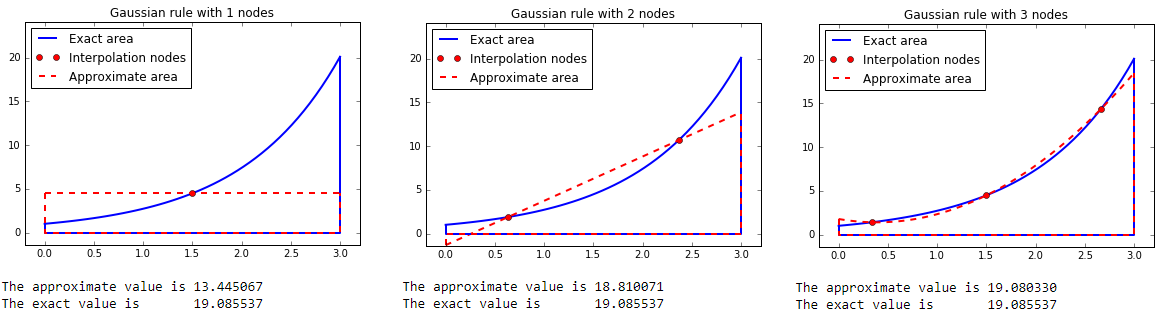 

--- 

---

#### Poznámka 9

* Ak je **neohraničený interval, na ktorom sa integruje alebo integrand je neohraničená funkcia** (v blízkosti integračných hraníc), potom je zväčša potrebné použiť špecializované numerické kvadratúry aby sa dosiahli presné aproximácie integrálov. 


* Jeden zo spôsobov **ako sa vysporiadať so singularitami v integrande** (napr. nuly v menovateli na intervale integrácie a pod.) je aplikovať vhodnú subtitúciu (transformáciu) pre zbavenie sa singularity a následne použiť niektorú "štandardnú" numerickú kvadratúru. Napr. 
<br/>
<br/>
$$\displaystyle\int\limits_{0}^{1}\dfrac{1}{e^x\sqrt{x}}\,\mathrm{d}x=2\displaystyle\int\limits_{0}^{1}\dfrac{1}{e^{t^2}}\,\mathrm{d}t;$$ 
<br/>
<br/>
alebo 
<br/>
<br/>
$$\displaystyle\int\limits_{0}^{\pi/2}\dfrac{\cos(x)}{\sqrt{x}}\,\mathrm{d}x=2\displaystyle\int\limits_{0}^{\sqrt{\pi/2}}\cos\left(t^2\right)\,\mathrm{d}t,$$
<br/> 
<br/>
pričom sa využila transformácia $x=t^2$. Ďalšie užitočné transformácie sú napr. $x=-\ln(t)$, $x=\dfrac{t}{1-t}$, $x=\mathrm{tan}(t)$, $x=\sqrt{\dfrac{1+t}{1-t}}$. 


* Dôležitým prípadom, kedy Gaussove kvadratúrne formule majú výhodu sú tie, keď integrand "ubieha" do nekonečna v okolí niektorej integračnej hranice. Dôvodom tejto výhody je fakt, že uzly Gaussovej kvadratúry sú vždy vnútorné body intervalu (podobná situácia ako s otvorenými Newtonovymi-Cotesovymi vzorcami). Tak napr. bez problémov je možné aplikovať Gaussovu kvadratúru na približný výpočet 
<br/> 
<br/>
$$\displaystyle\int\limits_{0}^{1}\dfrac{\sin(x)}{x}\,\mathrm{d}x,$$
<br/> 
<br/>
lebo hodnota $x=0$ sa nebude vyžadovať. Podobne je možné pohodlne aproximovať 
<br/> 
<br/>
$$\displaystyle\int\limits_{0}^{1}\dfrac{\sqrt[3]{x^2-1}}{\sqrt{\sin\left(e^x-1\right)}}\,\mathrm{d}x,$$
<br/> 
<br/>
a to i napriek singularite v bode $x=0$. Samozrejme, máme na mysli integrály, ktoré sú dobre definované a konečné i napriek singularite. Typickým príkladom je 
<br/> 
<br/>
$$\displaystyle\int\limits_{0}^{1}\dfrac{1}{\sqrt{x}}\,\mathrm{d}x.$$

---

<font color=orange> Vymyslite/nájdite integrál, pri aproximácii ktorého zlyhá niektorá z numerických kvadratúr predstavených v tomto učebnom texte. Overte to výpočtom v Pythone. </font> 

***
<a id=podmienenost></a>
 # <font color=brown> Podmienenosť úlohy numerického integrovania </font> 

Určitý integrál má peknú vlasnosť - totiž keď nastane **malá zmena hodnôt funkcie $f(x)$**, tak nastane i **malá zmena jej určitého integrálu**. Presnejšie teda, ak na intervale $\langle a,b \rangle$ platí pre Riemannovsky integrovateľné funkcie $f(x),g(x)$ vzťah $|f(x)-g(x)|<\varepsilon$, kde $\varepsilon>0$, tak potom 

$$\left|\displaystyle\int_{a}^{b}(f(x)-g(x))\,\mathrm{d}x\right|\le\displaystyle\int_{a}^{b}\left|f(x)-g(x)\right|\,\mathrm{d}x\le\displaystyle\int_{a}^{b}\varepsilon\,\mathrm{d}x=\varepsilon(b-a).$$ 

Tým pádom pokiaľ $\varepsilon$ je malé, tak i rozdiel medzi integrálmi $\displaystyle\int_{a}^{b}f(x)\,\mathrm{d}x$ a $\displaystyle\int_{a}^{b}g(x)\,\mathrm{d}x$ je malý. 

**Pri derivácii je situácia značne odlišná!** Ak na intervale $\langle a,b \rangle$ pre dve diferencovateľné funkcie $f(x),g(x)$ platí $|f(x)-g(x)|<\varepsilon$, kde $\varepsilon>0$, tak potom aj pri malom $\varepsilon$, môže byť rozdiel derivácií veľký. Nie je to také prekvapivé keď si uvedomíme, že derivácia $f'(x)$ je rovná smernici dotyčnice ku grafu $f(x)$ v bode $[x,f(x)]$ a podobne pri funkcii $g$. Z blízkosti hodnôt $f(x)$ a $g(x)$ nemusí nijako vyplývať, že dotyčnice ku grafom týchto funkcií v bodoch $[x,f(x)], [x,g(x)]$ majú približne rovnaký smer. 

--- 

#### <font color=blue> Príklad 10 </font>  

Napr. pre funkcie $f(x)=c,\,c\in\mathbb{R}$, $g(x)=c+\varepsilon\sin(ax)$, $\varepsilon>0,a>0$ platí $|f(x)-g(x)|=\varepsilon|\sin(ax)|\le\varepsilon$. Pre ich derivácie však platí 

$$\left|f'(x)-g'(x)\right|=|0-\varepsilon a\cos(ax)|=|\varepsilon a \cos(ax)|\le\varepsilon a,$$ 

pričom posledná nerovnosť sa zmení na rovnosť, keď je $ax$ rovné celočíselnému násobku $\pi$. Preto i keď $\varepsilon$ je malé, tak pre veľké $a$ bude absolútna hodnota rozdielu derivácií v niektorých bodoch veľká. Hodnoty funkcie $g(x)$ sa totiž od konštanty $c$ líšia iba málo (nanajvýš o $\pm\varepsilon$) ale pre veľké $a$ rýchlo oscilujú (harmonická funkcia $\varepsilon\sin(ax)$ má veľkú frekvenciu). Taktiež derivácia $g'(x)=\varepsilon a \cos(ax)$ sa od derivácie $f'(x)=0$ v niektorých bodoch podstatne líši (až o $\pm\varepsilon a$). Pre ilustráciu je možné zvoliť napr. $c=1$, $\varepsilon=0.1$, $a$ sa môže meniť od $1$ do $30$. Pre $a\to\infty$ rastie maximum $\varepsilon a$ absolútnej hodnoty rozdielu medzi hodnotami derivácií do nekonečna. Celú situáciu znázorňuje nasledujúci **interaktívny graf**, v ktorom je možné meniť parameter `a`.  

In [1]:
import numpy as np 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

def series(a): 
    c = 1 
    eps = 0.1
    x = np.linspace(0,4*np.pi,1000)
    fx = np.repeat(1,1000)
    dfx = 0*x
    gx = c + eps*np.sin(a*x)
    dgx = eps*a*np.cos(a*x) 
    fig = plt.figure()
    ax = plt.subplot(111) 
    plt.plot(x,fx, c='green', label='$f(x)=c$')
    plt.plot(x,dfx, c='orange', label='$\\dfrac{\\mathrm{d}}{\\mathrm{d}x}f(x)=0$')
    plt.plot(x,gx, c='red', label='$g(x)=c+\\varepsilon\\sin(ax)$') 
    plt.plot(x,dgx, c='blue', label='$\\dfrac{\\mathrm{d}}{\\mathrm{d}x}g(x)=\\varepsilon a \\cos(ax)$')
    plt.title('$a\\in[1,30], c=1, \\varepsilon=0.1$')
    # plt.legend(loc='lower right')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return()
interact(series, a=widgets.IntSlider(min=1, max=30, step=1, value=1));

interactive(children=(IntSlider(value=1, description='a', max=30, min=1), Output()), _dom_classes=('widget-int…

Pri integráloch uvažovaných funkcií je výsledok totálne odlišný. Totiž na ľubovoľnom intervale $\langle p,q \rangle$ platí: 

$$\displaystyle\int_{p}^{q}(f(x)-g(x))\,\mathrm{d}x=-\varepsilon\displaystyle\int_{p}^{q}\sin(ax)\,\mathrm{d}x=\dfrac{\varepsilon}{a}\left[\cos(ax)\right]_{p}^{q}\dfrac{\varepsilon(\cos(aq)-\cos(ap))}{a}.$$ 

Teda 

$$\left|\displaystyle\int_{p}^{q}f(x)\,\mathrm{d}x-\displaystyle\int_{p}^{q}g(x)\,\mathrm{d}x\right|=\left|\dfrac{\varepsilon(\cos(aq)-\cos(ap))}{a}\right|\le\dfrac{2\varepsilon}{a}\to0 \quad \text{pre } a\to\infty.$$ 

Čiže s rastúcim $a$ je naopak absolútna hodnota rozdielu medzi hodnotami integrálov čím ďalej tým menšia a blíži sa k nule pre $a\to\infty$. 

--- 

Ako je vidieť z predošlých úvah, pri numerickom výpočte určitého integrálu **sú zaujímavé najmä chyby matematického modelu zapríčinené diskretizáciou**. Nepresnosti vo funkčných hodnotách nehrajú takú dôležitú úlohu, pretože ich malé zmeny nemajú významný vplyv na hodnotu integrálu, ako sme poukázali vyššie. 

Ďalej ukážeme, že zaokrúhľovacie chyby pri výpočte vstupných hodnôt nemajú zásadný vplyv, pokiaľ sú všetky koeficienty (váhy) v kvadratúrnej formule $(3)$ kladné. Pre jednoduchosť nebudeme uvažovať zaokrúhľovacie chyby pri aritmetických operáciách. 

Pri akejkoľvek prakticky použiteľnej kvadratúrnej formule očakávame, že je presná pre konštatné funkcie. Voľbou $f(x)=1$, $x\in\langle a,b \rangle$, dostaneme zo vzťahu $I(f)=Q(f)+R(f)$, že 

$$w_0+w_1+\ldots+w_n=\displaystyle\int_{a}^{b}\mathrm{d}x=b-a.$$ 

Predpokladajme teraz, že miesto presných hodnôt $f_i=f(x_i)$ použijeme hodnoty $\tilde{f}_i=f_i+\varepsilon_i$, $i=0,1,\ldots,n$, pričom $|\varepsilon_i|\le\varepsilon$, kde $\varepsilon>0$ je malé číslo charakterizujúce nepresnosť vstupných hodnôt funkcie $f(x)$. Za približnú hodnotu integrálu teda prehlásime číslo 

$$Q_n\left(\tilde{f}\right)=w_0\tilde{f}_0+w_1\tilde{f}_1+\ldots+w_n\tilde{f}_n=w_0f_0+w_1f_1+\ldots+w_nf_n+w_0\varepsilon_0+w_1\varepsilon_1+\ldots+w_n\varepsilon_n=Q_n(f)+w_0\varepsilon_0+w_1\varepsilon_1+\ldots+w_n\varepsilon_n.$$ 

Odhadneme rozdiel medzi hodnotami $Q_n\left(\tilde{f}\right)$ a $Q(f)$, čím dostaneme 

$$\left|Q\left(\tilde{f}\right)-Q(f)\right|=|w_0\varepsilon_0+w_1\varepsilon_1+\ldots+w_n\varepsilon_n|\le|w_0||\varepsilon_0|+|w_1||\varepsilon_1|+\ldots+|w_n||\varepsilon_n|\le(w_0+w_1+\ldots+w_n)\varepsilon=\varepsilon(b-a).$$ 

Využili sme pritom predpoklad, že koeficienty $w_i$ sú kladné. Predchádzajúci odhad nezávisí ani na počte uzlov, ani na dĺžke kroku. Pre malé $\varepsilon$ je teda vplyv nepresností vstupných hodnôt nepodstatný a rozhodujúci podiel na celkovej chybe má chyba numerického modelu (diskretizačná chyba). To je v zhode s tým, čo sme uviedli už skôr. 

Predošlé zdôvodnenie ukazuje, prečo je **pre dobrú podmienenosť numerickej integrácie dôležité, aby koeficienty kvadratúrnej formule boli kladné**. Túto požiadavku spĺňajú napr. Gaussove-Legendrove formule. Iná situácia je pri Newtonovych-Cotesovych vzorcoch. Dá sa ukázať, že tieto formule majú všetky koeficienty kladné iba pre $n=1,2,\ldots,7$ a $n=9$. To je ďalší dôvod, prečo nie je vhodné používať tieto formule pre vysoké $n$. 

***
<a id=zdroje></a>
 # <font color=brown> Použité zdroje</font> 

* Ackleh, A.S., Allen, E.J., Kearfott, R.B., & Seshaiyer, P. (2009). Classical and Modern Numerical Analysis: Theory, Methods and Practice. Chapman and Hall/CRC. 


* Burden, R. L., & Faires, J. D. (2011). Numerical analysis. Brooks/Cole, Cengage Learning. 


* Čermák, L. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Fajmon, B., Hlavičková, I., Novák, M., Vítovec, J. (2014). Numerická matematika a pravděpodobnost. Ústav matematiky FEKT VUT v Brně. 


* Gezerlis, A. (2020). Numerical methods in physics with Python. Cambridge University Press. 


* Gilli, M., Maringer, D., Schumann, E. (2019). Numerical Methods and Optimization in Finance. Elsevier/Academic Press. 


* Kiusalaas, J. (2013). Numerical Methods in Engineering with Python 3. Cambridge University Press, USA.


* Kincaid, D., & Cheney, E. W. (2002). Numerical analysis: Mathematics of scientific computing. Pacific Grove, CA: Brooks/Cole.


* Kiseľák, J. (2020). Základy numerických metód. ÚMV PF UPJŠ. 


* Kong, Q., Siauw, T., Bayen, A. (2020). [Python Programming and Numerical Methods: A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html). Academic Press. 


* Oršanský, P., Ftorek B. (2021). Štatistické a numerické metódy. EDIS - UNIZA.


* Růžičková, I. & Hlavička, R. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Sauer, T. (2011). Numerical Analysis. Addison-Wesley Publishing Company, USA. 


* Sullivan, E. (2020). Numerical Methods: An Inquiry-Based Approach With Python. Faculty Publications. 